In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
csv_directory = 'C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_18_Aug2018/results/20182108_I_N2c_HSVRepeat_EVOS10x/Triangle/cell_count_GFP.tif.csv'

csv_2308 = 'C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_18_Aug2018/results/20182308_I_N2c_HSVRepeat_EVOS10x/Triangle/cell_count_GFP.tif.csv'

csv_2508_2708 = 'C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_18_Aug2018/results/20182708_I_N2c_HSVRepeat_EVOS10x/Triangle/cell_count_GFP.tif.csv'

In [11]:
df = pd.read_csv(csv_directory)



In [141]:
p1 = df[0:2112]
p2 = df[2112:4224]

p1_li_rfp = p1[0:528]
p1_li_gfp = p1[528:1056]
p1_triangle_rfp = p1[1056:1584]
p1_triangle_gfp = p1[1584:2112]

p2_li_rfp = p2[0:528]
p2_li_gfp = p2[528:1056]
p2_triangle_rfp = p2[1056:1584]
p2_triangle_gfp = p2[1584:2112]


p1_triangle_gfp_2 = p1_triangle_gfp.reset_index(drop=True)
p1_li_gfp_2 = p1_li_gfp.reset_index(drop = True)

p1_com_gfp = pd.concat((p1_li_gfp_2, p1_triangle_gfp_2))
p1_by_row_gfp = p1_com_gfp.groupby(p1_com_gfp.index)
p1_com_gfp_means = p1_by_row_gfp.mean()

p2_triangle_gfp_2 = p2_triangle_gfp.reset_index(drop=True)
p2_li_gfp_2 = p2_li_gfp.reset_index(drop = True)

p2_com_gfp = pd.concat((p2_li_gfp_2, p2_triangle_gfp_2))
p2_by_row_gfp = p2_com_gfp.groupby(p2_com_gfp.index)
p2_com_gfp_means = p2_by_row_gfp.mean()

p1_triangle_rfp_2 = p1_triangle_rfp.reset_index(drop=True)
p1_li_rfp_2 = p1_li_rfp.reset_index(drop = True)

p1_com_rfp = pd.concat((p1_li_rfp_2, p1_triangle_rfp_2))
p1_by_row_rfp = p1_com_rfp.groupby(p1_com_rfp.index)
p1_com_rfp_means = p1_by_row_rfp.mean()

p2_triangle_rfp_2 = p2_triangle_rfp.reset_index(drop=True)
p2_li_rfp_2 = p2_li_rfp.reset_index(drop = True)

p2_com_rfp = pd.concat((p2_li_rfp_2, p2_triangle_rfp_2))
p2_by_row_rfp = p2_com_rfp.groupby(p2_com_rfp.index)
p2_com_rfp_means = p2_by_row_rfp.mean()

csv_directory2 = 'C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_14_Jun2018/results/N2c/20180703_I_N2c_HSVRepeat_EVOS10x/Triangle/cell_count_GFP.tif.csv'

df2 = pd.read_csv(csv_directory2)

li = df2[0:8448]
triangle = df2[8448:16896]

li_rfp = li[0:4224]
li_gfp = li[4224:8448]

triangle_rfp = triangle[0:4224]
triangle_gfp = triangle[4224:8448]

triangle_gfp_2 = triangle_gfp.reset_index(drop=True)
li_gfp_2 = li_gfp.reset_index(drop = True)
com_gfp = pd.concat((li_gfp, triangle_gfp_2))
by_row_gfp = com_gfp.groupby(com_gfp.index)
p0_com_gfp_means = by_row_gfp.mean()

triangle_rfp_2 = triangle_rfp.reset_index(drop=True)
li_rfp_2 = li_rfp.reset_index(drop = True)
com_rfp = pd.concat((li_rfp, triangle_rfp_2))
by_row_rfp = com_rfp.groupby(com_rfp.index)
p0_com_rfp_means = by_row_rfp.mean()




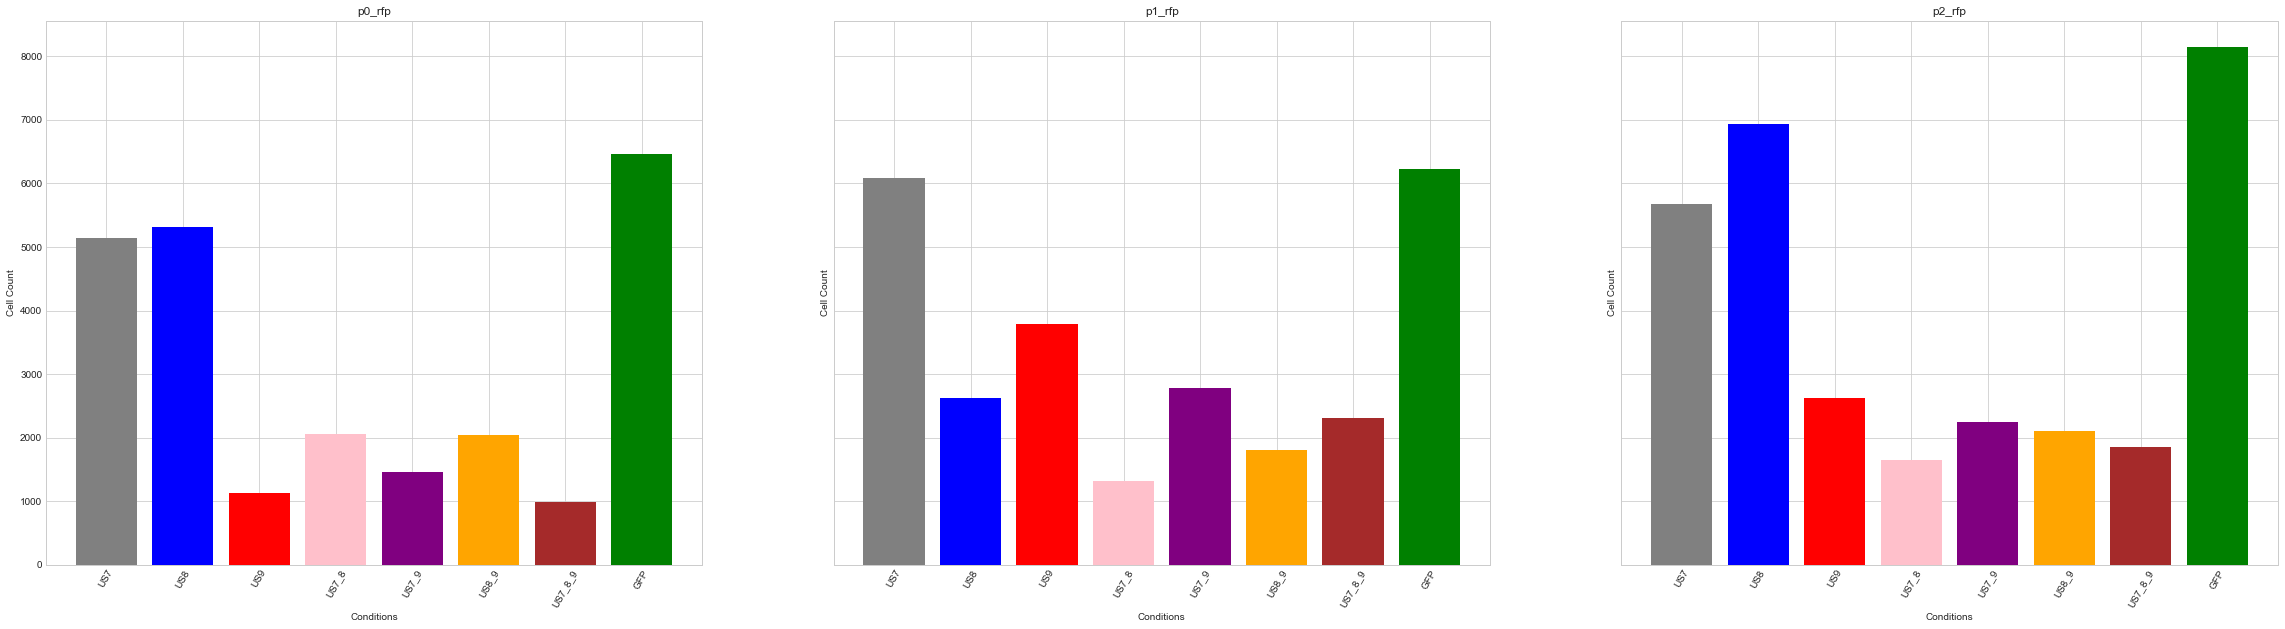

In [142]:
legend = ["US7", "US8", "US9", "US7_8", "US7_9", "US8_9", "US7_8_9", "GFP"]
df_list = [p0_com_rfp_means, p1_com_rfp_means , p2_com_rfp_means ]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize = (40,10))
Day_list = ["0619"]
axes = [ax1, ax2, ax3]
titles = ["p0_rfp","p1_rfp",  "p2_rfp"]



for aa in range(len(df_list)):
    day_jump = 528
    well_jump = 66
    bar = [0]*len(legend)

    for v in range(len(legend)):        
        well_j = 66*(v+1)
        c1 = [0]*len(Day_list)
        c1_sem = [0]*len(Day_list)
        w1 = df_list[aa][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Count"].sum()
        w2 = df_list[aa][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Count"].sum()
        w3 = df_list[aa][int(well_j-(well_jump/3)):well_j]["Count"].sum()
        w_m = [w1, w2, w3]
        c1 = np.mean(w_m)
        
        #if v == 9:
            #c1 = df_list[aa][0:528]["Count"].mean()
        
        bar[v] = c1
          
    axes[aa].bar(legend, bar, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey'])
    axes[aa].set_xlabel("Conditions")
        
    axes[aa].set_title(titles[aa])
    axes[aa].set_ylabel("Cell Count")
    axes[aa].set_xticks(np.arange(len(legend)))
    axes[aa].set_xticklabels(legend, rotation =60)



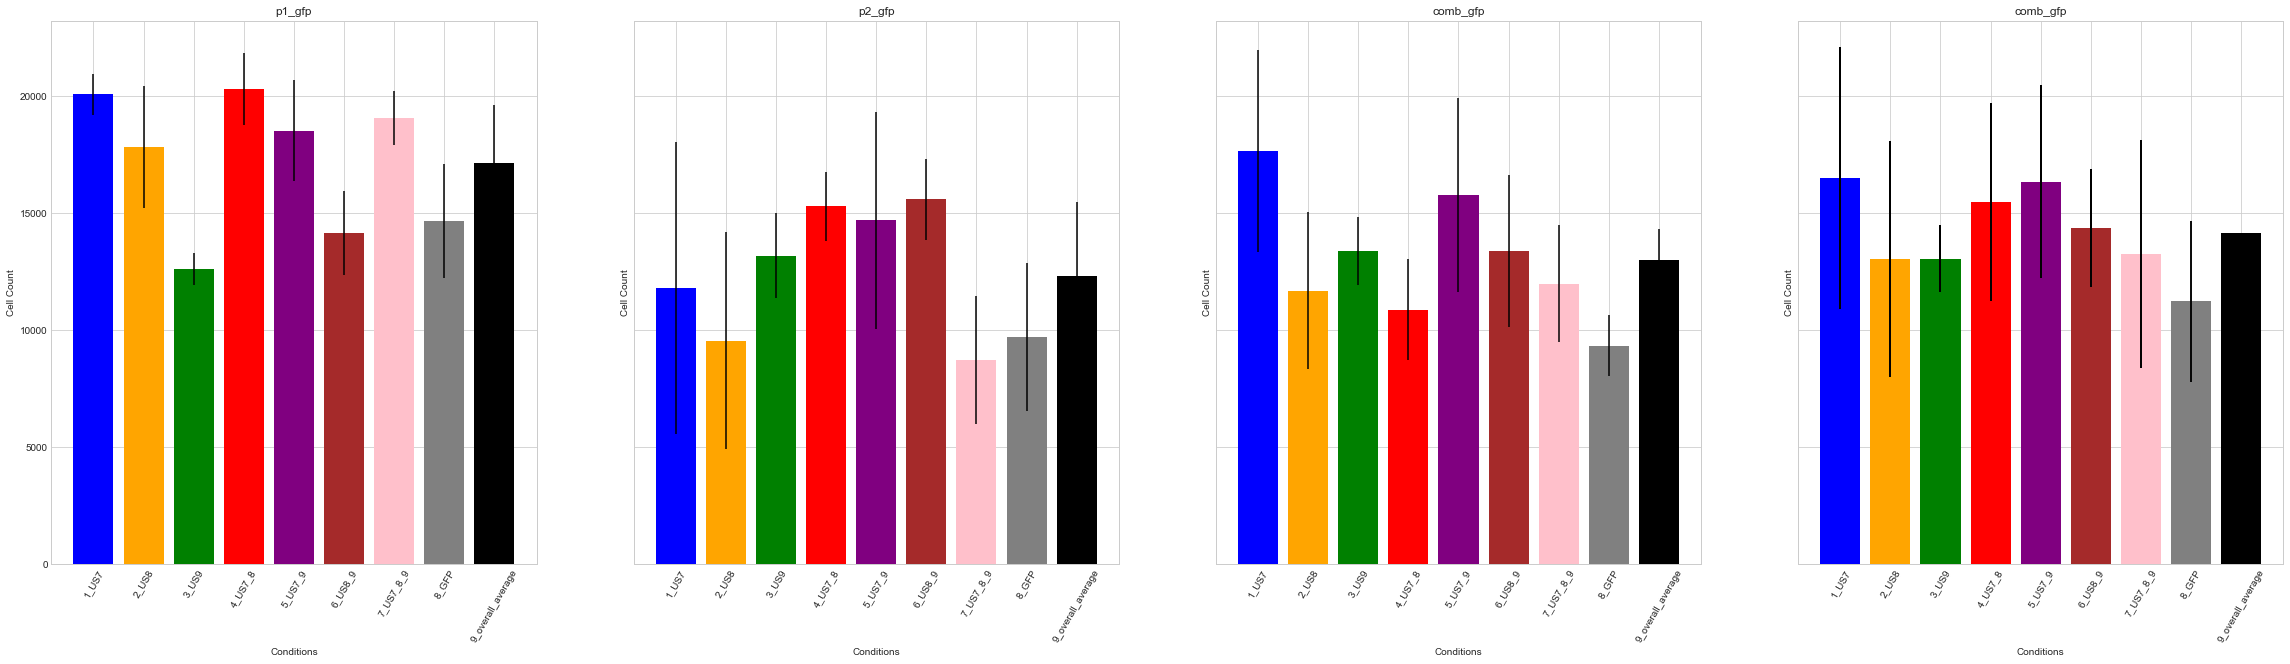

In [143]:
legend = ["1_US7", "2_US8", "3_US9", "4_US7_8", "5_US7_9", "6_US8_9", "7_US7_8_9", "8_GFP", "9_overall_average"]
df_list = [p0_com_gfp_means, p1_com_gfp_means, p2_com_gfp_means]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize = (40,10))
Day_list = ["0619"]
axes = [ax1, ax2, ax3, ax4]
titles = ["p1_gfp", "p2_gfp", "comb_gfp"]

well_jump = 66


for aa in range(len(df_list)):

    bar = [0]*len(legend)
    std = [0]*len(legend)

    for v in range(len(legend)):      
        if v == 8:
            c1 = (df_list[aa][0:528]["Count"].sum())/24
            
        else:
            well_j = 66*(v+1)
            c1 = [0]*len(Day_list)
            c1_sem = [0]*len(Day_list)
            w1 = df_list[aa][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Count"].sum()
            w2 = df_list[aa][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Count"].sum()
            w3 = df_list[aa][int(well_j-(well_jump/3)):well_j]["Count"].sum()       
            w_m = [w1, w2, w3]
            c1 = np.mean(w_m)
        
        

        bar[v] = c1
        std[v] = np.std(w_m)
          
    axes[aa].bar(legend, bar, yerr = std, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'black'])
    axes[aa].set_xlabel("Conditions")
        
    axes[aa].set_title(titles[aa])
    axes[aa].set_ylabel("Cell Count")
    axes[aa].set_xticks(np.arange(len(legend)))
    axes[aa].set_xticklabels(legend, rotation =60)

bar2 = [0]*len(legend)    
std2 = [0]*len(legend)


for vv in range(len(legend)):
    if vv == 8:
            c1 =  (df_list[0][0:528]["Count"].sum()  +  df_list[1][0:528]["Count"].sum() + df_list[2][0:528]["Count"].sum())/72
            c1_std = np.std(c1)
    
    else:
    
        well_j = 66*(vv+1)
        c1 = [0]*len(Day_list)

        w1 = df_list[0][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Count"].sum()
        w2 = df_list[0][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Count"].sum()
        w3 = df_list[0][int(well_j-(well_jump/3)):well_j]["Count"].sum()       

        w4 = df_list[1][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Count"].sum()
        w5 = df_list[1][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Count"].sum()
        w6 = df_list[1][int(well_j-(well_jump/3)):well_j]["Count"].sum()     

        w7 = df_list[2][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Count"].sum()
        w8 = df_list[2][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Count"].sum()
        w9 = df_list[2][int(well_j-(well_jump/3)):well_j]["Count"].sum()       



        w_m = [w1, w2, w3, w4, w5, w6, w7, w8, w9]
        c1 = np.mean(w_m)
        c1_std = np.std(w_m)
    
 
    bar2[vv] = c1
    std2[vv] = c1_std

    axes[3].bar(legend, bar2, yerr = std2, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'black'])
    axes[3].set_xlabel("Conditions")
        
    axes[3].set_title(titles[2])
    axes[3].set_ylabel("Cell Count")
    axes[3].set_xticks(np.arange(len(legend)))
    axes[3].set_xticklabels(legend, rotation =60)

3077.4791666666665
3367.0
3904.6041666666665


[Text(0,0,'1_US7'),
 Text(0,0,'2_US8'),
 Text(0,0,'3_US9'),
 Text(0,0,'4_US7_8'),
 Text(0,0,'5_US7_9'),
 Text(0,0,'6_US8_9'),
 Text(0,0,'7_US7_8_9'),
 Text(0,0,'8_GFP'),
 Text(0,0,'9_overall_average')]

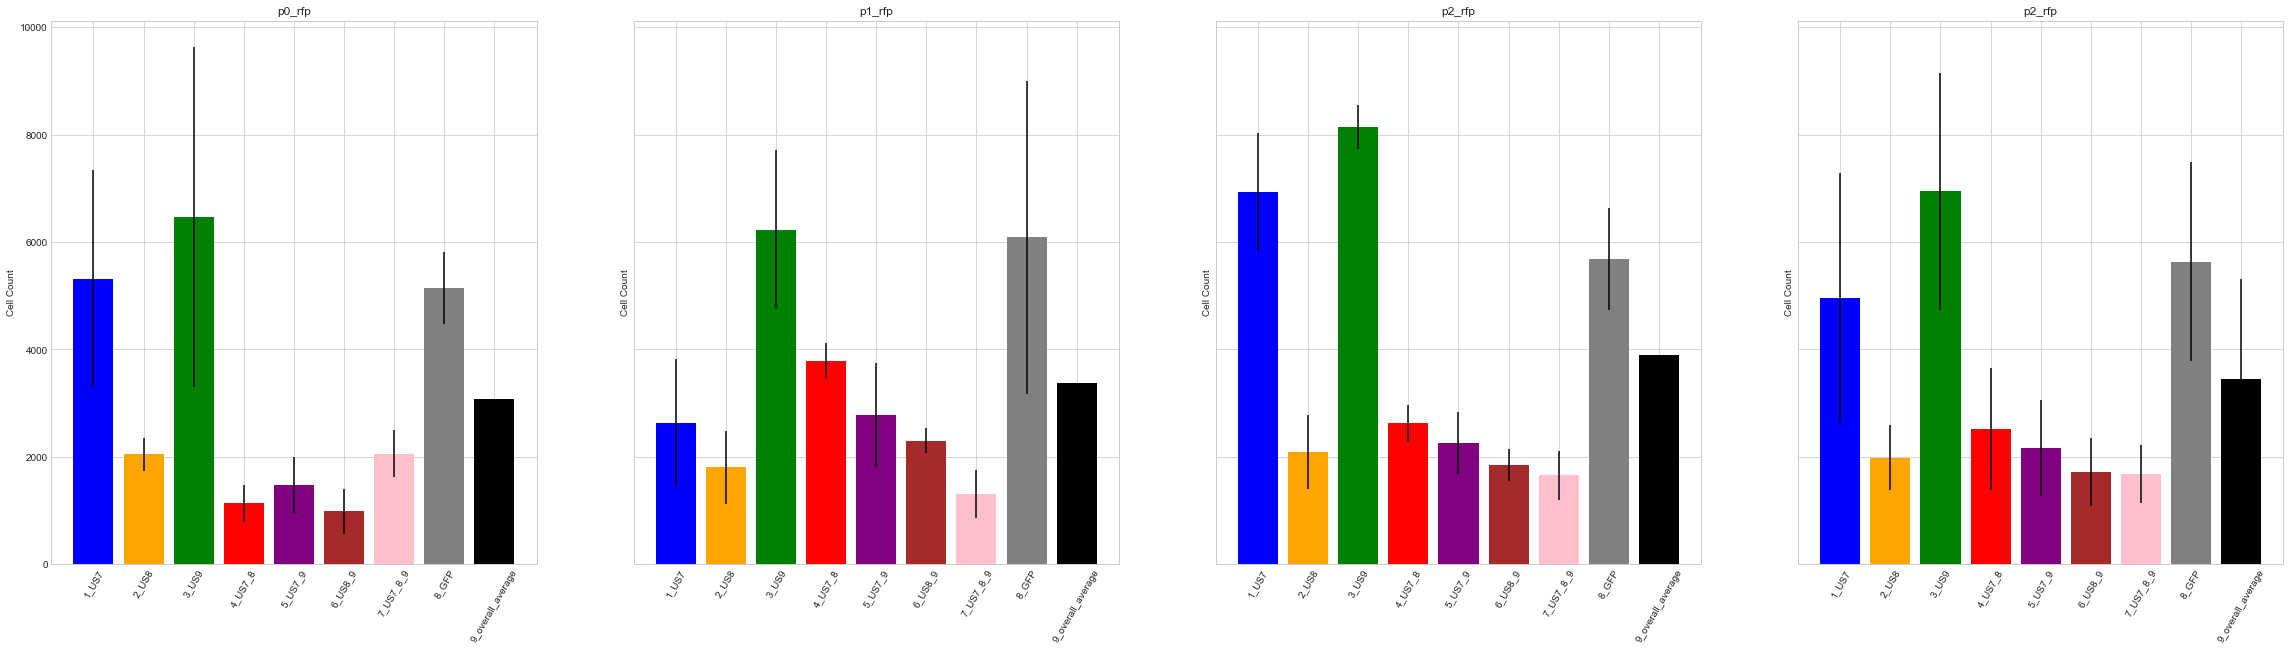

In [144]:
legend = [ "1_US7", "2_US8", "3_US9", "4_US7_8", "5_US7_9", "6_US8_9", "7_US7_8_9", "8_GFP",  "9_overall_average"]
df_list = [p0_com_rfp_means, p1_com_rfp_means, p2_com_rfp_means]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, figsize = (40,10))
Day_list = ["0619"]
axes = [ax1, ax2, ax3, ax4]
titles = ["p0_rfp", "p1_rfp", "p2_rfp", "comb_rfp"]

well_jump = 66


for aa in range(len(df_list)):

    bar = [0]*len(legend)
    std = [0]*len(legend)

    for v in range(len(legend)):  
        if v == 8:
            c1 = (df_list[aa][0:528]["Count"].sum())/24
            print(c1)
            bar[v] = c1

        
        else: 
            well_j = 66*(v+1)
            c1 = [0]*len(Day_list)
            c1_sem = [0]*len(Day_list)
            w1 = df_list[aa][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Count"].sum()
            w2 = df_list[aa][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Count"].sum()
            w3 = df_list[aa][int(well_j-(well_jump/3)):well_j]["Count"].sum()       
            w_m = [w1, w2, w3]
            c1 = np.mean(w_m)
        
     

            bar[v] = c1
            std[v] = np.std(w_m)
          
    axes[aa].bar(legend, bar, yerr = std, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'black'])
    #axes[aa].set_xlabel("Conditions")
        
    axes[aa].set_title(titles[aa])
    axes[aa].set_ylabel("Cell Count")
    axes[aa].set_xticks(np.arange(len(legend)))
    axes[aa].set_xticklabels(legend, rotation =60)

bar2 = [0]*len(legend)    
std2 = [0]*len(legend)


for vv in range(len(legend)):
    if vv == 8:
            c1 =  (df_list[0][0:528]["Count"].sum()  +  df_list[1][0:528]["Count"].sum() + df_list[2][0:528]["Count"].sum())/72
    
    else:
        well_j = 66*(vv+1)
        c1 = [0]*len(Day_list)

        w1 = df_list[0][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Count"].sum()
        w2 = df_list[0][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Count"].sum()
        w3 = df_list[0][int(well_j-(well_jump/3)):well_j]["Count"].sum()       

        w4 = df_list[1][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Count"].sum()
        w5 = df_list[1][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Count"].sum()
        w6 = df_list[1][int(well_j-(well_jump/3)):well_j]["Count"].sum()     

        w7 = df_list[2][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Count"].sum()
        w8 = df_list[2][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Count"].sum()
        w9 = df_list[2][int(well_j-(well_jump/3)):well_j]["Count"].sum()       

    

        w_m = [w1, w2, w3, w4, w5, w6, w7, w8, w9]
        c1 = np.mean(w_m)
        c1_std = np.std(w_m)
    
    
    bar2[vv] = c1
    std2[vv] = c1_std

axes[3].bar(legend, bar2, yerr = std2, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'black'])
    #axes[3].set_xlabel("Conditions")
        
axes[3].set_title(titles[2])
axes[3].set_ylabel("Cell Count")
axes[3].set_xticks(np.arange(len(legend)))
axes[3].set_xticklabels(legend, rotation =60)


In [45]:
csv_2308 = 'C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_18_Aug2018/results/20182308_I_N2c_HSVRepeat_EVOS10x/Triangle/cell_count_GFP.tif.csv'

df_2308 = pd.read_csv(csv_2308)

In [46]:
#Take just the count columns from both spreadsheets 

count_2108 = df['Count']
count_2308 = df_2308['Count']

df_count_2108 = pd.DataFrame(count_2108)
df_count_2308 = pd.DataFrame(count_2308)




In [47]:
#Merge the sheets and rename the columns to the relevant dates

full_table = pd.merge(df_count_2108, df_count_2308, left_index = True, right_index = True)

full_table.rename(columns = {'Count_x':'2108', 'Count_y':'2308'}, inplace = True)

full_table

,2108,2308
0,114,247
1,16,99
2,151,280
3,93,186
4,54,246
5,58,163
6,149,286
7,119,342
8,62,133
9,121,217


In [145]:
#Make Sub-dataframes

p1 = full_table[0:2112]
p2 = full_table[2112:4224]

p1_li_rfp = full_table[0:528]
p1_li_gfp = full_table[528:1056]
p1_triangle_rfp = full_table[1056:1584]
p1_triangle_gfp = full_table[1584:2112]

p2_li_rfp = full_table[0:528]
p2_li_gfp = full_table[528:1056]
p2_triangle_rfp = full_table[1056:1584]
p2_triangle_gfp = full_table[1584:2112]

##

p1_triangle_gfp_2 = p1_triangle_gfp.reset_index(drop=True)
p1_li_gfp_2 = p1_li_gfp.reset_index(drop = True)

p1_com_gfp = pd.concat((p1_li_gfp_2, p1_triangle_gfp_2))
p1_by_row_gfp = p1_com_gfp.groupby(p1_com_gfp.index)
p1_com_gfp_means = p1_by_row_gfp.mean()

##

p2_triangle_gfp_2 = p2_triangle_gfp.reset_index(drop=True)
p2_li_gfp_2 = p2_li_gfp.reset_index(drop = True)

p2_com_gfp = pd.concat((p2_li_gfp, p2_triangle_gfp_2))
p2_by_row_gfp = p2_com_gfp.groupby(p2_com_gfp.index)
p2_com_gfp_means = p2_by_row_gfp.mean()

##

p1_triangle_rfp_2 = p1_triangle_rfp.reset_index(drop=True)
p1_li_rfp_2 = p1_li_rfp.reset_index(drop = True)

p1_com_rfp = pd.concat((p1_li_rfp, p1_triangle_rfp_2))
p1_by_row_rfp = p1_com_rfp.groupby(p1_com_rfp.index)
p1_com_rfp_means = p1_by_row_rfp.mean()

##

p2_triangle_rfp_2 = p2_triangle_rfp.reset_index(drop=True)
p2_li_rfp_2 = p2_li_rfp.reset_index(drop = True)

p2_com_rfp = pd.concat((p2_li_rfp, p2_triangle_rfp_2))
p2_by_row_rfp = p2_com_rfp.groupby(p2_com_rfp.index)
p2_com_rfp_means = p2_by_row_rfp.mean()



In [275]:
p2_com_gfp_means[0:0]

,2108,2308


         2108        2308
0  536.007576  533.530303
         2108        2308
0  434.037879  369.356061
         2108        2308
0  598.522727  507.030303
         2108        2308
0  694.651515  650.689394
        2108        2308
0  667.80303  627.613636
         2108       2308
0  707.810606  696.05303
         2108        2308
0  396.219697  412.325758
        2108        2308
0  440.44697  463.969697
         2108        2308
0  556.409091  585.469697
         2108        2308
0  485.409091  446.590909
         2108        2308
0  619.545455  524.257576
         2108        2308
0  727.121212  705.272727
         2108        2308
0  755.878788  700.909091
         2108        2308
0  807.393939  810.893939
         2108        2308
0  444.787879  461.712121
         2108        2308
0  474.242424  458.787879


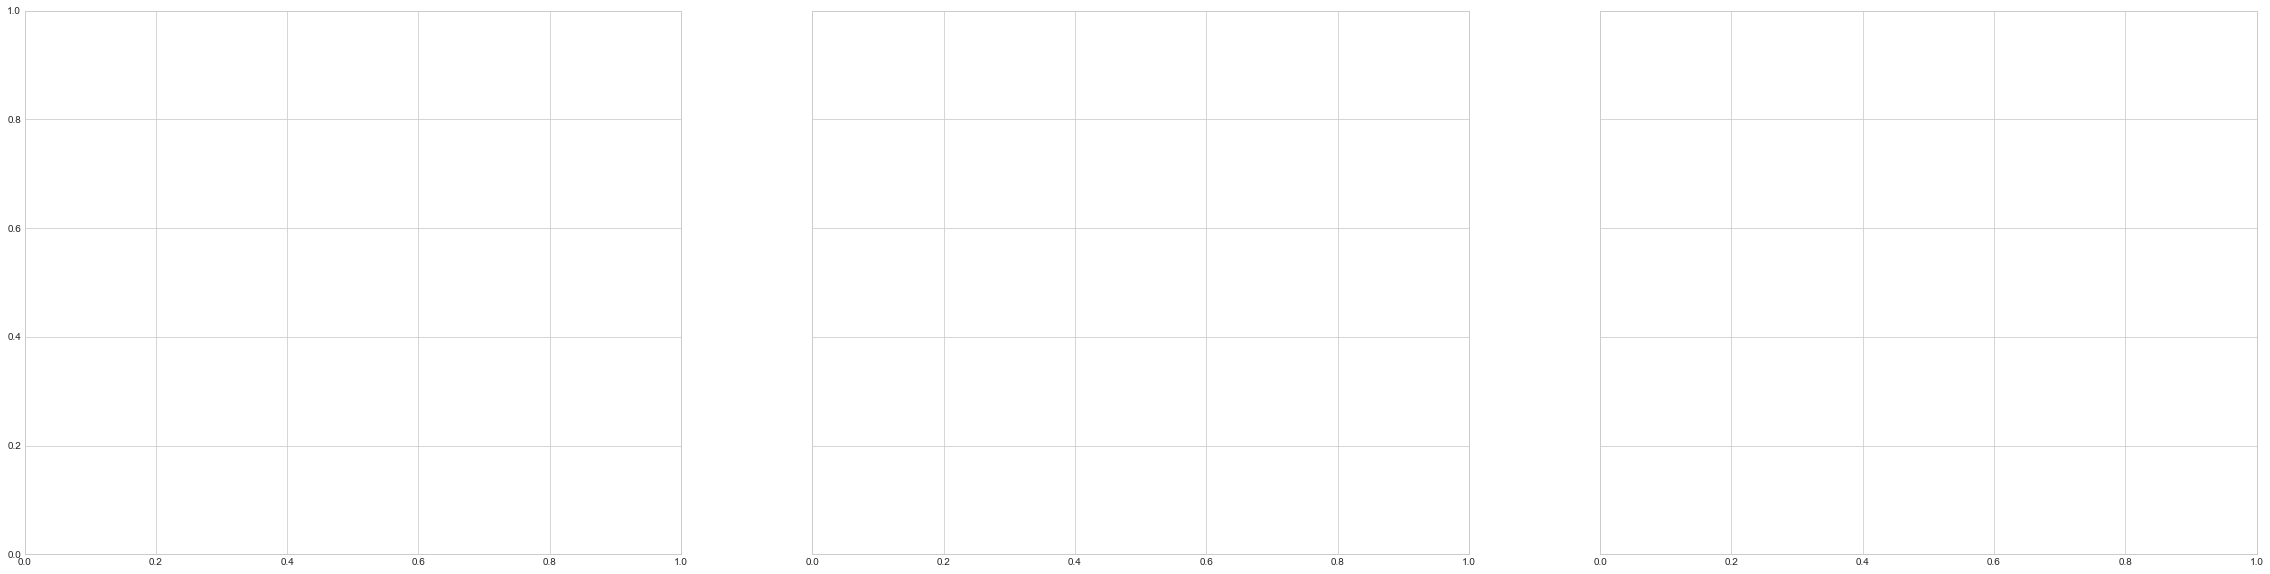

In [305]:
Day_list = ["2108", "2308"]
legend = ["US7", "US8", "US9", "US7_8", "US7_9", "US8_9", "US7_8_9", "GFP"]

df_list = [p1_com_gfp_means, p2_com_gfp_means]
well_jump = 66
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = True, sharey = True, figsize = (40,10))

#for i in range(2):   # go over a linear list of data
      #ix = np.unravel_index(i, ax.shape) # compute an appropriate index (1d or 2d)


for aa in range(len(df_list)):
    mean_plot = pd.DataFrame(columns = Day_list)
    
    for q in range(len(legend)):
            well_j = 66*(q+1)
            mean = (df_list[aa][well_j-well_jump:well_j-int(((well_jump/3)*2))].mean() + df_list[aa][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))].mean() + df_list[aa][int(well_j-(well_jump/3)):well_j].mean())/3
            mean = mean.to_frame().T
            print(mean)
            #mean_plot
    
    #print(mean_plot.head())
    
    #mean_plot.plot(title = 'Test', ax = ax[aa], xticks = df_list[aa].index, label = legend[q] )
            #print(axes[aa])
    #axes[aa].set_xlabel ("Days")
    #axes[aa].set_ylabel("Cell Count")


In [299]:
mean_plot

,2108,2308


2108
[536.0075757575758, 0]
2108
[536.0075757575758, 533.530303030303]
2108
[434.0378787878788, 533.530303030303]
2108
[434.0378787878788, 369.3560606060607]
2108
[598.5227272727273, 369.3560606060607]
2108
[598.5227272727273, 507.030303030303]
2108
[694.651515151515, 507.030303030303]
2108
[694.651515151515, 650.689393939394]
2108
[667.8030303030303, 650.689393939394]
2108
[667.8030303030303, 627.6136363636364]
2108
[707.810606060606, 627.6136363636364]
2108
[707.810606060606, 696.0530303030304]
2108
[396.219696969697, 696.0530303030304]
2108
[396.219696969697, 412.32575757575756]
2108
[440.4469696969697, 412.32575757575756]
2108
[440.4469696969697, 463.969696969697]


ValueError: x and y must have same first dimension, but have shapes (8,) and (2,)

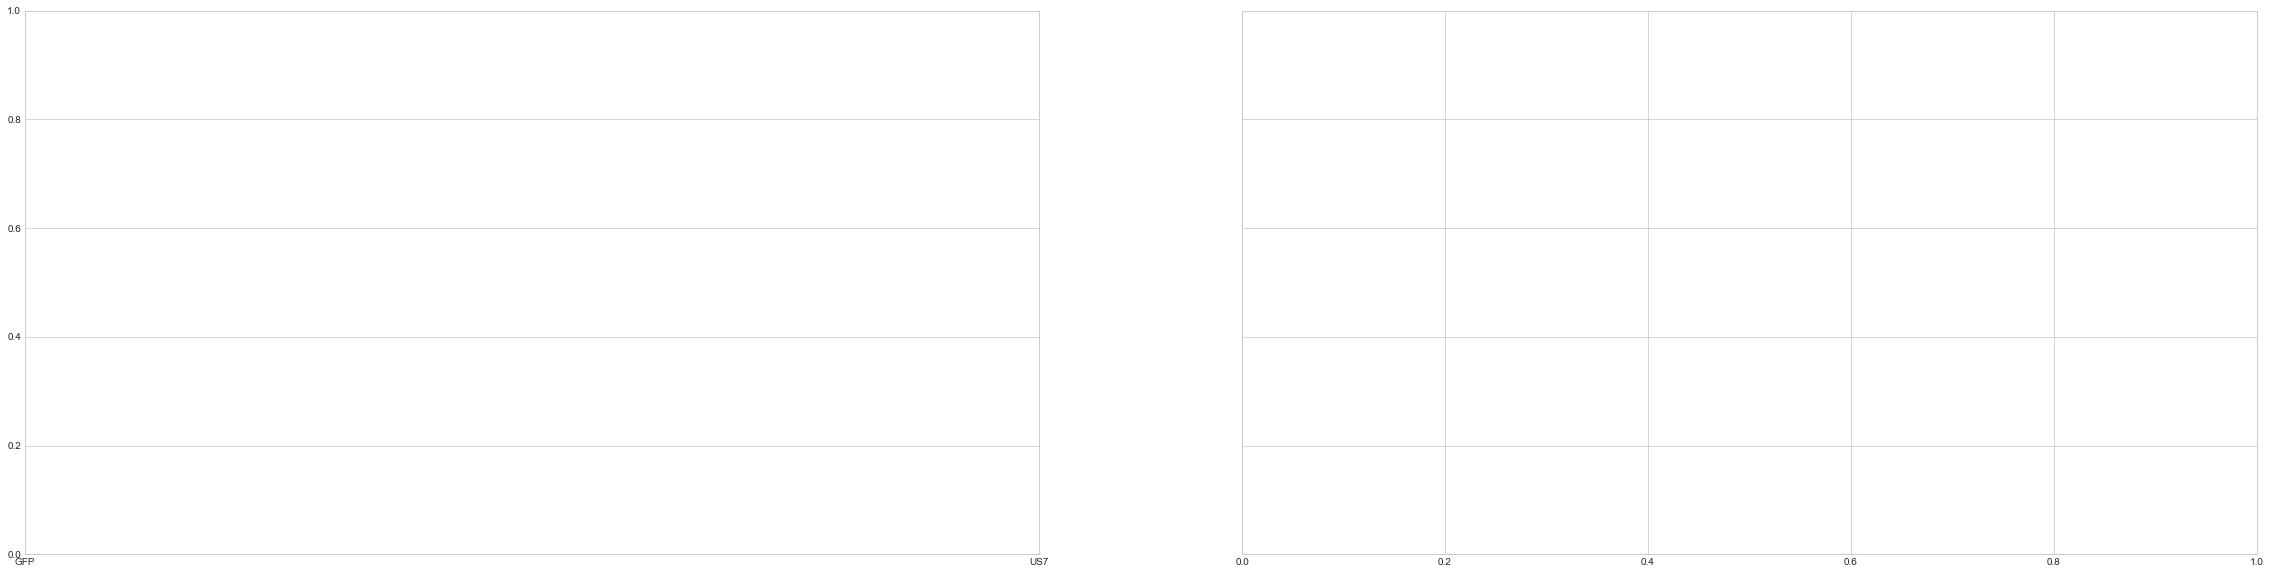

In [200]:
Day_list = ["2108", "2308"]
df_list = [p1_com_gfp_means, p2_com_gfp_means]
titles = ["rfp", "gfp"]


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,  figsize = (40,10))
axes = [ax1, ax2]

well_jump = 66
legend = ["US7", "US8", "US9", "US7_8", "US7_9", "US8_9", "US7_8_9", "GFP"]

for aa in range(len(df_list)):
    c1 = [0]*len(Day_list)

    
    for q in range(len(legend)):
            well_j = 66*(q+1)

            
            for qq in range(len(Day_list)):
                print(Day_list[aa])
                w1 = df_list[aa][well_j-well_jump:well_j-int(((well_jump/3)*2))][Day_list[qq]].mean()
                w2 = df_list[aa][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))][Day_list[qq]].mean()
                w3 = df_list[aa][int(well_j-(well_jump/3)):well_j][Day_list[qq]].mean()
                w_m = [w1, w2, w3]
                c1[qq]= np.mean(w_m)
                print(c1)
                
    axes[aa].plot(legend, c1)
    axes[aa].set_xlabel("Days")
    axes[aa].set_ylabel("Cell Count")

axes[aa].set_title(titles[aa])
axes[aa].legend(legend)


#len(df_list)




In [181]:
len(df_list)

2